<a href="https://colab.research.google.com/github/SoheilBadri2000/DataScience2/blob/main/17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sequential vs Functional API in Keras

## Using Sequential API

In [26]:
# General library import
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Tensorflow / Keras import
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.optimizers import Adam

###  import the dataset (predicting energy output and exhaust vacuum for a power plant)

In [4]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00294/CCPP.zip"
!unzip CCPP.zip
df = pd.read_excel("CCPP/Folds5x2_pp.xlsx")
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### Define a function to get the outputs of the model

In [30]:
def get_outputs(data):
  y1 = data.pop("PE")
  y1 = np.array(y1)
  y2 = data.pop("V")
  y2 = np.array(y2)
  return y1, y2

In [31]:
train, test = train_test_split(df, test_size=0.2, random_state=1)

y_train = get_outputs(train)
y_test = get_outputs(test)
# print("Y:", y_train.shape, y_test.shape)

min_max = MinMaxScaler()

X_train = min_max.fit_transform(train)
X_test = min_max.transform(test)
# print("X:", X_train.shape, X_test.shape)

In [32]:
# Building the neural network (here we use 2 hidden layers and one branched layer with 10 neurons each)
input_layer = Input(shape=(3,), name="input_layer")

# Defining hidden layers
Layer_1 = Dense(10, activation="relu", name="Layer_1")(input_layer)
Layer_2 = Dense(10, activation="relu", name="Layer_2")(Layer_1)

# Defining output layer y1
y1_output = Dense(1, activation="linear", name="y1_output")(Layer_2)

# Defining branched layer
Branched_layer = Dense(10, activation="relu", name="Branched_layer")(Layer_2)

# Defining 2nd output layer y2
y2_output = Dense(1, activation="linear", name="y2_output")(Branched_layer)

# Defining the model
model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

In [33]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, 3)]                  0         []                            
                                                                                                  
 Layer_1 (Dense)             (None, 10)                   40        ['input_layer[0][0]']         
                                                                                                  
 Layer_2 (Dense)             (None, 10)                   110       ['Layer_1[0][0]']             
                                                                                                  
 Branched_layer (Dense)      (None, 10)                   110       ['Layer_2[0][0]']             
                                                                                            

In [34]:
# defining the optimizer and loss function
model.compile(optimizer="adam", loss={"y1_output":"mse", "y2_output":"mse"})

# training the model
history = model.fit(X_train, y_train, epochs=300, verbose=True, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/300
60/60 [==============================] - 1s 6ms/step - loss: 209715.0625 - y1_output_loss: 206642.9844 - y2_output_loss: 3072.0918 - val_loss: 209556.4531 - val_y1_output_loss: 206520.9688 - val_y2_output_loss: 3035.4875
Epoch 2/300
60/60 [==============================] - 0s 3ms/step - loss: 209192.2812 - y1_output_loss: 206218.9844 - y2_output_loss: 2973.2561 - val_loss: 208710.0781 - val_y1_output_loss: 205852.2812 - val_y2_output_loss: 2857.7905
Epoch 3/300
60/60 [==============================] - 0s 3ms/step - loss: 207719.2656 - y1_output_loss: 205083.3125 - y2_output_loss: 2635.8398 - val_loss: 206346.3125 - val_y1_output_loss: 204052.8438 - val_y2_output_loss: 2293.4648
Epoch 4/300
60/60 [==============================] - 0s 3ms/step - loss: 204126.5000 - y1_output_loss: 202366.2656 - y2_output_loss: 1760.2662 - val_loss: 201401.6250 - val_y1_output_loss: 200289.9219 - val_y2_output_loss: 1111.7307
Epoch 5/300
60/60 [==============================] - 0s 3ms/step - l

In [38]:
# Model predictions
predictions = model.predict(X_test)
predicted_energy = predictions[0]
predicted_vacuum = predictions[1]

60/60 [==============================] - 0s 3ms/step


Text(0, 0.5, 'predicted energy output')

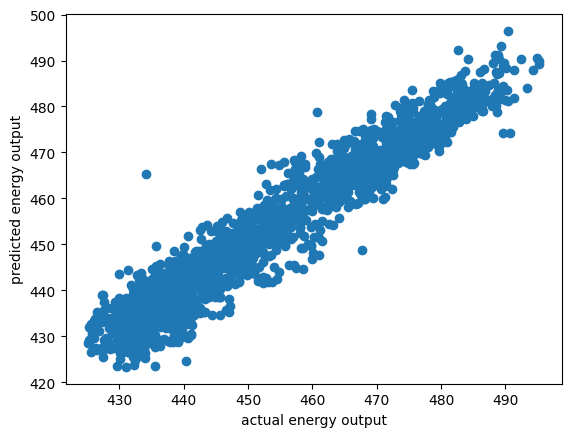

In [39]:
# Plotting Actual vs Predicted energy
plt.scatter(y_test[0], predicted_energy)
plt.xlabel("actual energy output")
plt.ylabel("predicted energy output")

Text(0, 0.5, 'predicted exhaust vacuum')

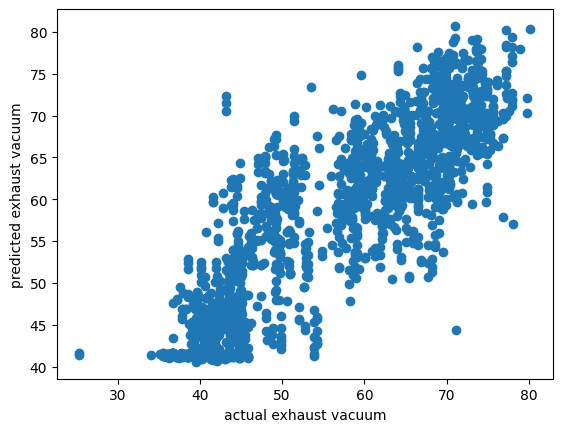

In [40]:
# Plotting Actual vs Predicted exhaust vacuum
plt.scatter(y_test[1], predicted_vacuum)
plt.xlabel("actual exhaust vacuum")
plt.ylabel("predicted exhaust vacuum")

In [41]:
# evaluation
print("r2 score for energy predicted:", r2_score(y_test[0], predicted_energy))
print("r2 score for exhaust vacuum predicted:", r2_score(y_test[1], predicted_vacuum))

r2 score for energy predicted: 0.9258509633306174
r2 score for exhaust vacuum predicted: 0.7682724403058112
